## TP1 - Visión por Computadora 1

### Parte 1. White Patch

1) Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def white_patch(image):
    img = image.astype(np.float32)
    
    # Asumimos que los valores máximos de color en los 
    # tres canales es el color del blanco bajo la luz de la 
    # escena.
    Rmax = np.max(img[:,:,2])
    Gmax = np.max(img[:,:,1])
    Bmax = np.max(img[:,:,0])
    
    # Log
    print("Máximos: Rojo", Rmax, "Verde", Gmax, "Azul", Bmax)
    
    # Evitar divisiones por cero
    Rmax = max(Rmax, 1)
    Gmax = max(Gmax, 1)
    Bmax = max(Bmax, 1)

    # Normalizamos entonces al color de la luz blanca puro 
    # (255, 255, 255)
    img[:,:,2] = img[:,:,2] * (255.0 / Rmax)
    img[:,:,1] = img[:,:,1] * (255.0 / Gmax)
    img[:,:,0] = img[:,:,0] * (255.0 / Bmax)
    
    # Mantener valores válidos 0 - 255
    img = np.clip(img, 0, 255)
    
    return img.astype(np.uint8)

2) Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.

A continuación se comparan las imagenes originales con las imágenes corregidas utilizando el método White Patch:

Máximos: Rojo 247.0 Verde 157.0 Azul 175.0


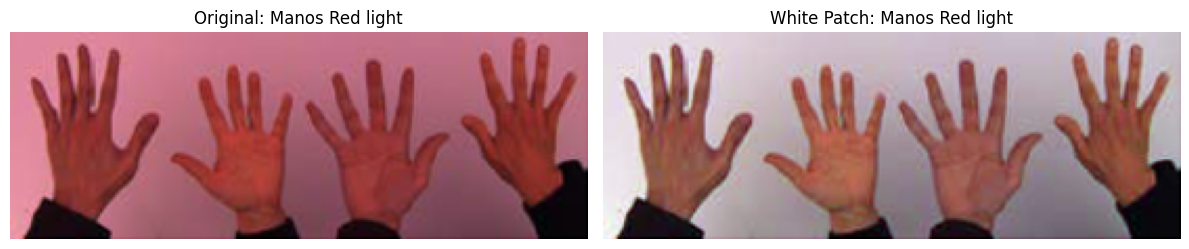

Máximos: Rojo 210.0 Verde 250.0 Azul 171.0


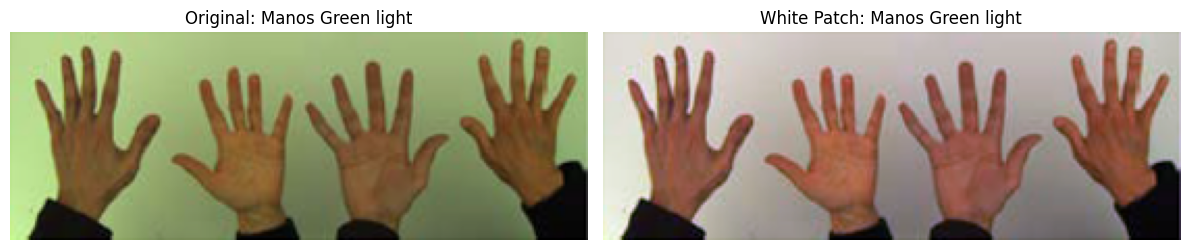

Máximos: Rojo 165.0 Verde 138.0 Azul 200.0


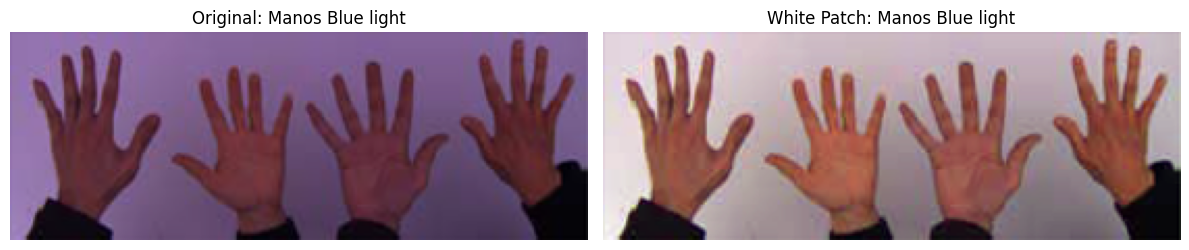

Máximos: Rojo 255.0 Verde 255.0 Azul 255.0


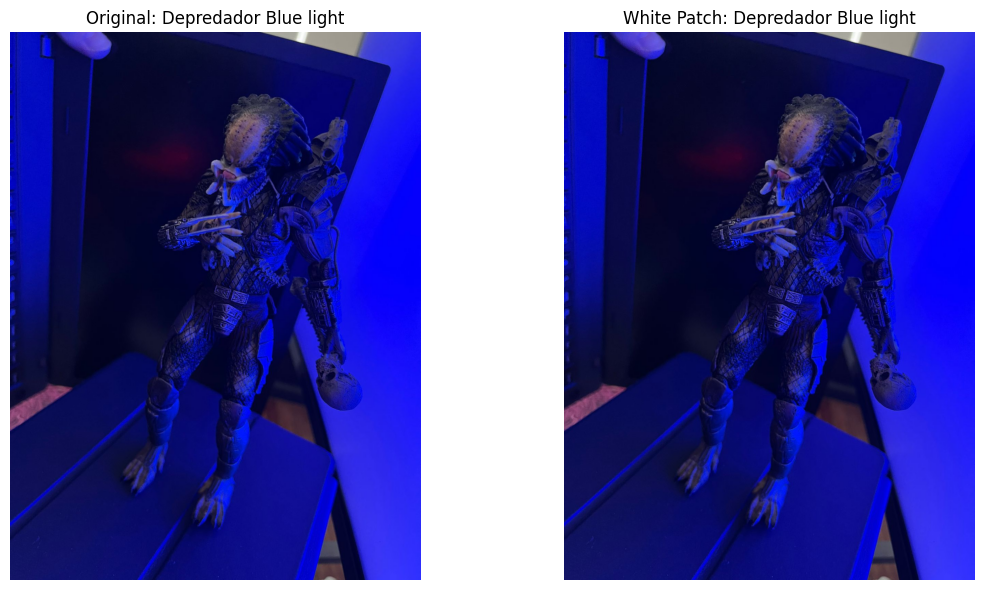

Máximos: Rojo 126.0 Verde 252.0 Azul 155.0


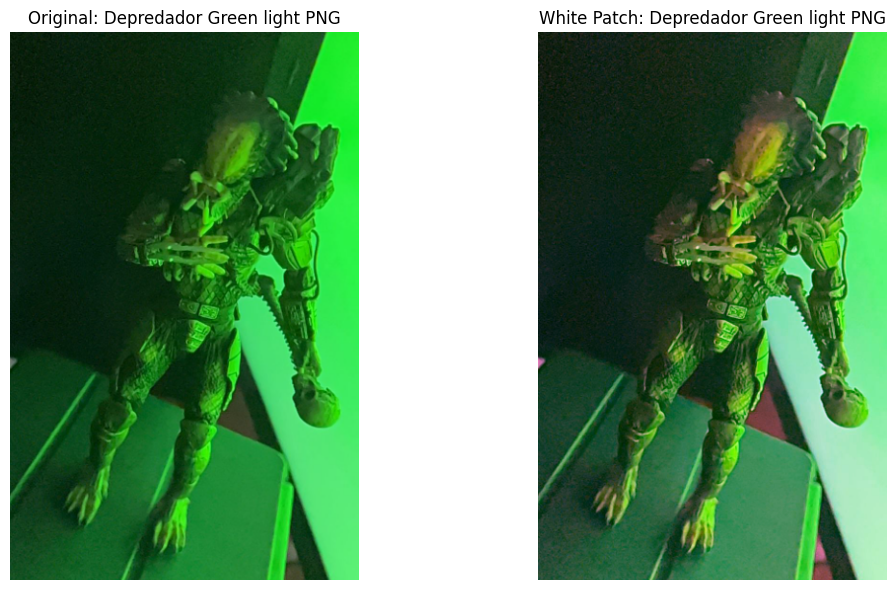

Máximos: Rojo 170.0 Verde 255.0 Azul 172.0


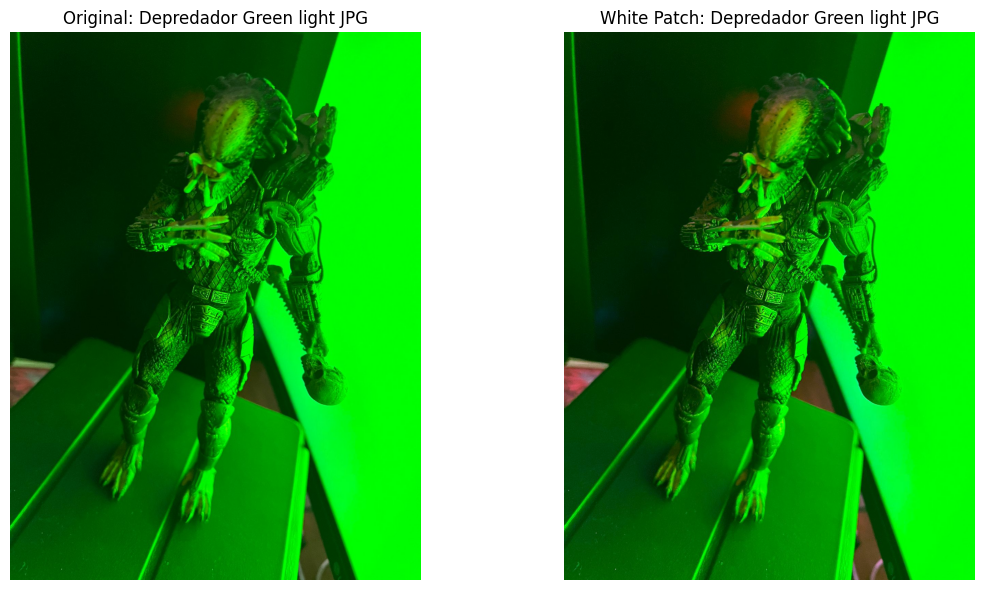

Máximos: Rojo 255.0 Verde 134.0 Azul 122.0


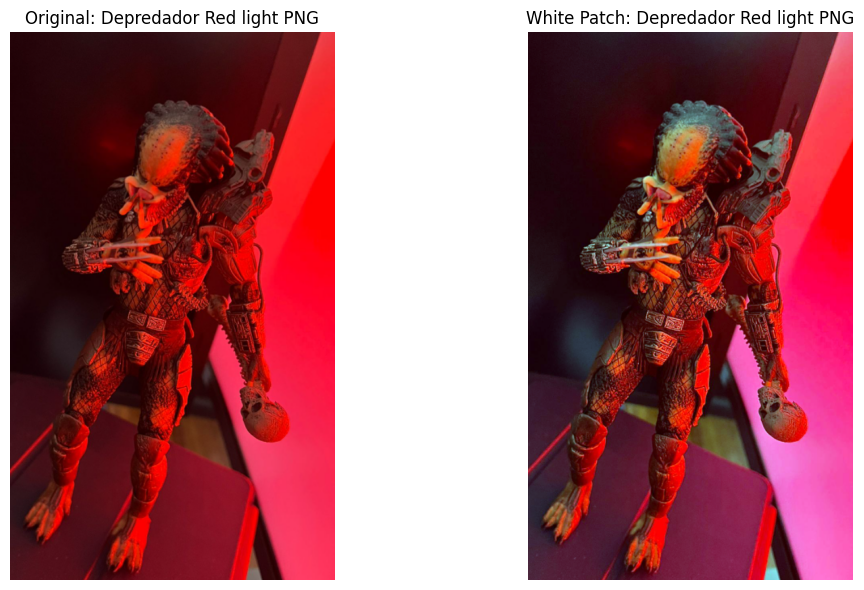

Máximos: Rojo 255.0 Verde 201.0 Azul 203.0


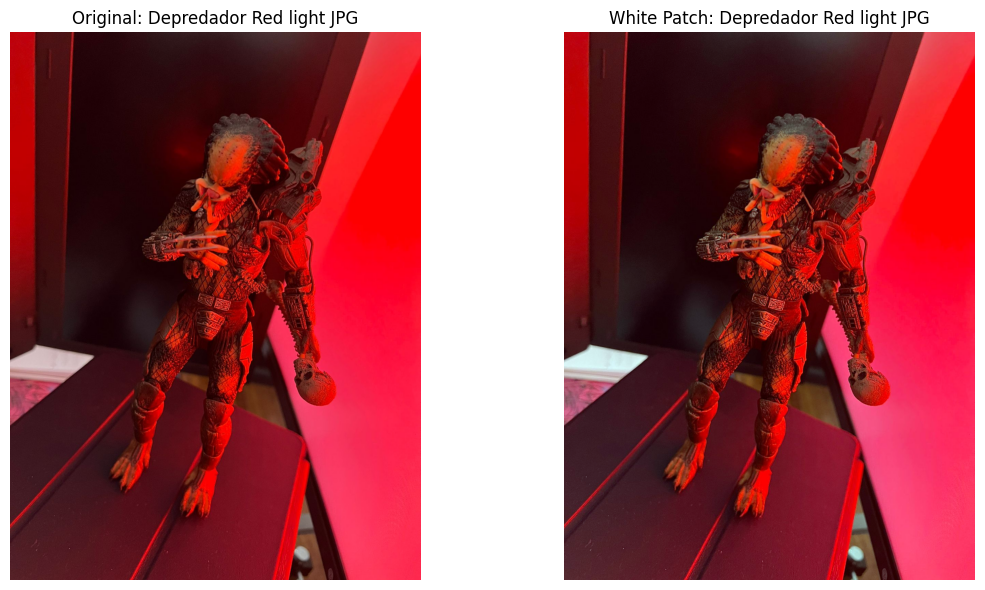

In [25]:
def mostrar_comparacion(original, corregida, titulo):
    """
    Muestra la imagen original y la corregida una al lado de la otra.
    """
    # Paso la imagen de BRG a RGB
    original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
    corregida_rgb = cv2.cvtColor(corregida, cv2.COLOR_BGR2RGB)

    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    ax1.imshow(original_rgb)
    ax1.set_title(f"Original: {titulo}")
    ax1.axis('off')

    ax2.imshow(corregida_rgb)
    ax2.set_title(f"White Patch: {titulo}")
    ax2.axis('off')

    plt.tight_layout()
    plt.show()

# Imágenes de prueba
test_r = cv2.imread("white_patch/test_red.png")
test_g = cv2.imread("white_patch/test_green.png")
test_b = cv2.imread("white_patch/test_blue.png")

wp_blue = cv2.imread("white_patch/wp_blue.jpg")
wp_green1 = cv2.imread("white_patch/wp_green.png")
wp_green2 = cv2.imread("white_patch/wp_green2.jpg")
wp_red1 = cv2.imread("white_patch/wp_red.png")
wp_red2 = cv2.imread("white_patch/wp_red2.jpg")

# Diccionarios de imágenes para mostrar
imgs_test = {
    "Manos Red light": test_r,
    "Manos Green light": test_g,
    "Manos Blue light": test_b,
}

imgs_wp = {
    "Depredador Blue light": wp_blue,
    "Depredador Green light PNG": wp_green1,
    "Depredador Green light JPG": wp_green2,
    "Depredador Red light PNG": wp_red1,
    "Depredador Red light JPG": wp_red2,
}

def show_results(images_dict):
    for titulo, img in images_dict.items():
        mostrar_comparacion(img, white_patch(img), titulo)

show_results(imgs_test)
show_results(imgs_wp)

📝 En base a los resultados obtenidos, podemos observar que para las imágenes de las manos el algoritmo corrige bastante bien los colores. En cambio, para las imágenes con el depredador, White-Patch es poco efectivo y esto se debe principalmente a que ciertos canales tienen el valor máximo (255) pero que no corresponden al color blanco sino que es efecto de la propia iluminación.

El principal problema se encuentra en la imágen "Depredador Blue light" el cual tiene en todos sus canales el valor máximo de 255. Esto genera que no se aplique ninguna corrección a la imágen (se simplifican los cocientes a 1).

<div style="text-align: center;">
  <img src="algoritmo.png">
</div>

Para solventar el problema anterior, se decide aplicar White-Patch utilizando percentiles (cercanos al 100%) en lugar del valor máximo para cada canal.

In [40]:
def white_patch_percentil(image, percentil=99):
    img = image.astype(np.float32)
    
    # Ahora utilizamos el percentil en lugar del máximo
    Rmax = np.percentile(img[:,:,2], percentil)
    Gmax = np.percentile(img[:,:,1], percentil)
    Bmax = np.percentile(img[:,:,0], percentil)

    # Log
    print("Percentil(", percentil, "): Rojo", Rmax, "Verde", Gmax, "Azul", Bmax)

    img[:,:,2] = img[:,:,2] * (255.0 / Rmax)
    img[:,:,1] = img[:,:,1] * (255.0 / Gmax)
    img[:,:,0] = img[:,:,0] * (255.0 / Bmax)

    # Mantener valores válidos 0 - 255
    img = np.clip(img, 0, 255)

    return img.astype(np.uint8)

Percentil( 97 ): Rojo 69.0 Verde 61.0 Azul 253.0


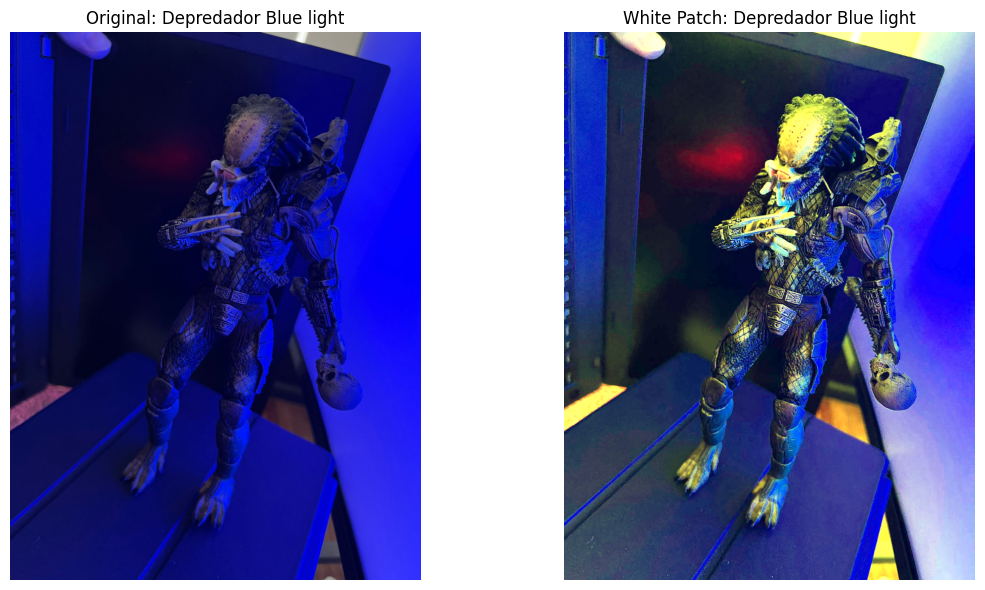

Percentil( 98 ): Rojo 86.0 Verde 69.0 Azul 253.0


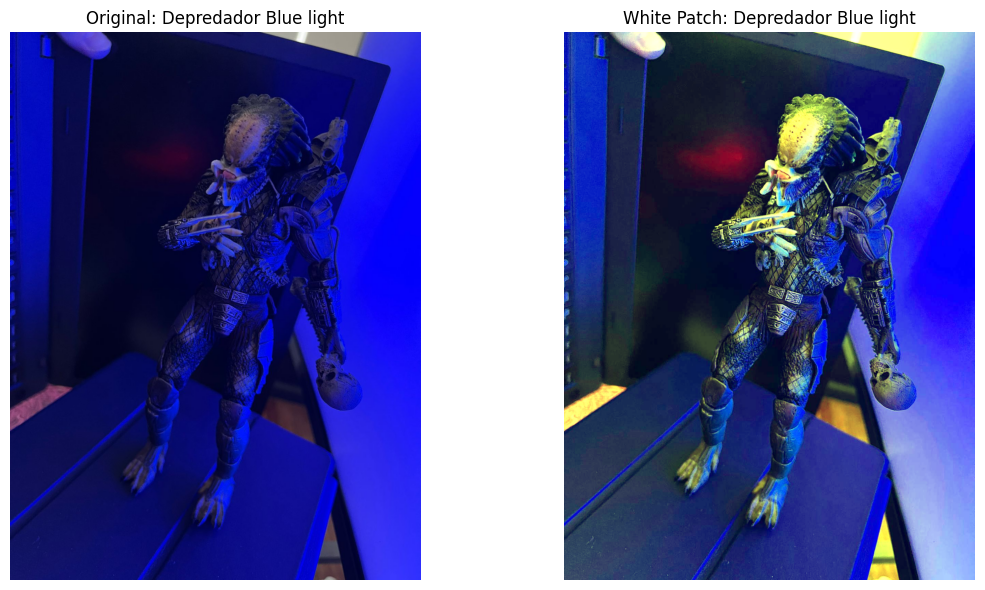

Percentil( 99 ): Rojo 117.0 Verde 86.0 Azul 254.0


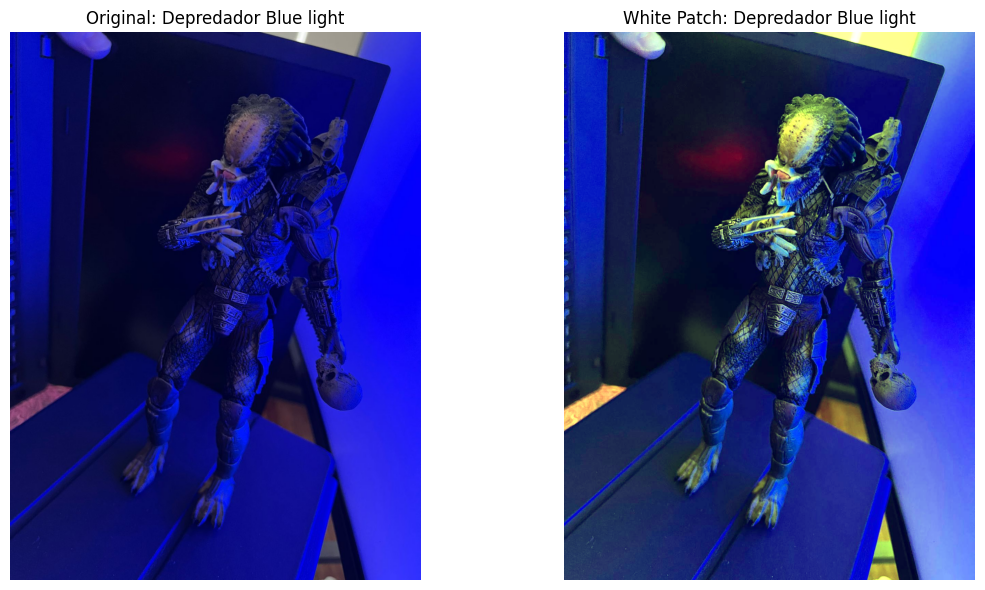

Percentil( 99.5 ): Rojo 155.0 Verde 151.0 Azul 255.0


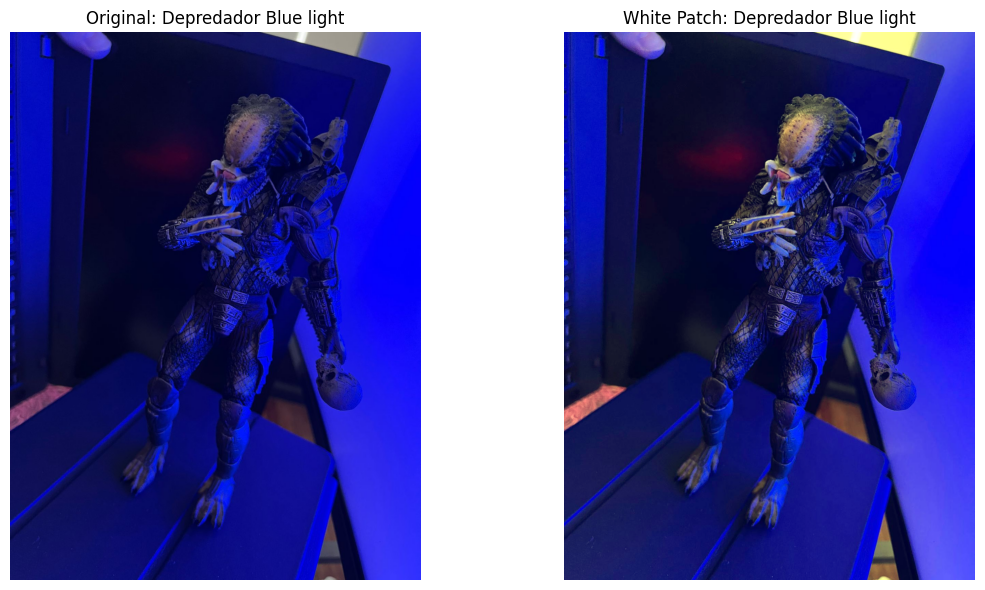

In [41]:
mostrar_comparacion(wp_blue, white_patch_percentil(wp_blue, percentil=97), "Depredador Blue light")
mostrar_comparacion(wp_blue, white_patch_percentil(wp_blue, percentil=98), "Depredador Blue light")
mostrar_comparacion(wp_blue, white_patch_percentil(wp_blue, percentil=99), "Depredador Blue light")
mostrar_comparacion(wp_blue, white_patch_percentil(wp_blue, percentil=99.5), "Depredador Blue light")

📝 Vemos que utilizando distintos percentiles se logra corregir mejor la iluminación de la imágen.

---

### Parte 2
1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y 
visualizarlas.

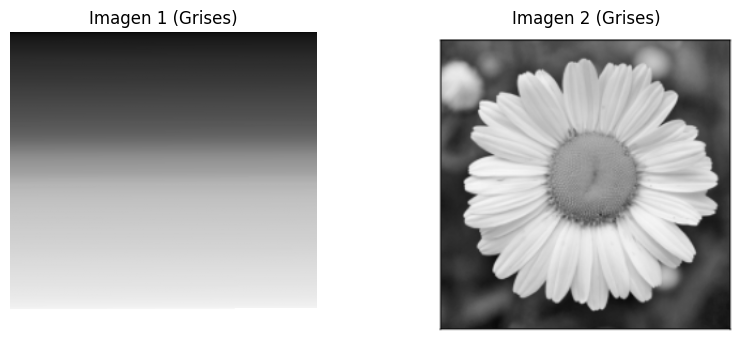

In [42]:
# Cargar imágenes en escala de grises
img1 = cv2.imread("img1_tp.png", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("img2_tp.png", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img1, cmap='gray')
plt.title("Imagen 1 (Grises)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2, cmap='gray')
plt.title("Imagen 2 (Grises)")
plt.axis('off')

plt.show()


2) Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas 
entre si.

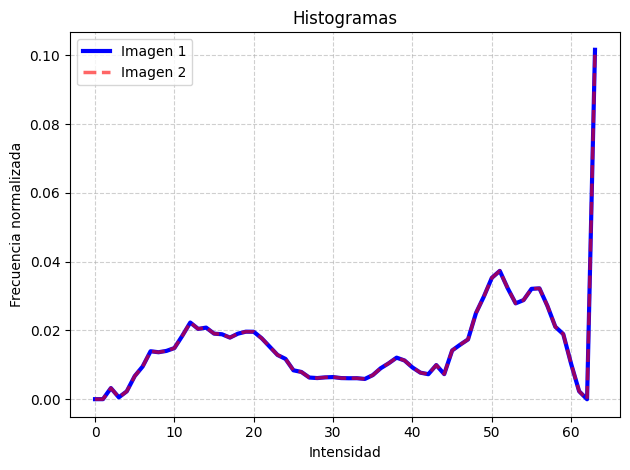

In [43]:
# # Número de bins
bins = 64  

# Calcular histogramas
#hist1, bins = np.histogram(img1.ravel(), bins, range=(0, 256))
#hist2, bins = np.histogram(img2.ravel(), bins, range=(0, 256))
hist1 = cv2.calcHist([img1], [0], None, [bins], [0, 256])
hist2 = cv2.calcHist([img2], [0], None, [bins], [0, 256])

# Normalizar para comparar
hist1 = hist1 / hist1.sum()
hist2 = hist2 / hist2.sum()

plt.plot(hist1, 
         color='blue',    
         linewidth=3,    
         linestyle='-',    
         label='Imagen 1')

plt.plot(hist2, 
         color='red', 
         alpha=0.6,        
         linewidth=2.5,    
         linestyle='--',
         label='Imagen 2')

plt.title('Histogramas')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia normalizada')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=10)

# Mejorar los ejes
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()



Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, considera que puede ser de utilidad tomar como ‘features’ a los histogramas?

📝 A partir de los histogramas podemos ver que las imagenes tienen la misma distribución de intensidades, a pesar de que visualmente son imagenes completamente diferentes. Por lo tanto, no sería conveniente utilizar los histogramas como features para un modelo de clasificación/detección de imágenes, ya que el modelo no podría diferenciar entre los dos tipos de imágenes. Se necesitarían features adicionales que capturen otra información.